
**Лабораторная №5**

Реализовать как минимум три алгоритма кластеризации (обучение без учителя) из библиотеки sklearn, и сравнить их (метрику определить самостоятельно), визуализировать результаты и написать выводы (в ячейке markdown). В выводах отразить, все ли признаки являются значимыми для кластеризации, сколько классов (кластеров) можно выделить в данных, и почему.

Датасет посвящён пользователям кредитных карт.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [34]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [36]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [37]:
df.shape

(8950, 18)

In [38]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [39]:
df.isna().sum()/df.count()*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011174
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.623943
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

<Axes: >

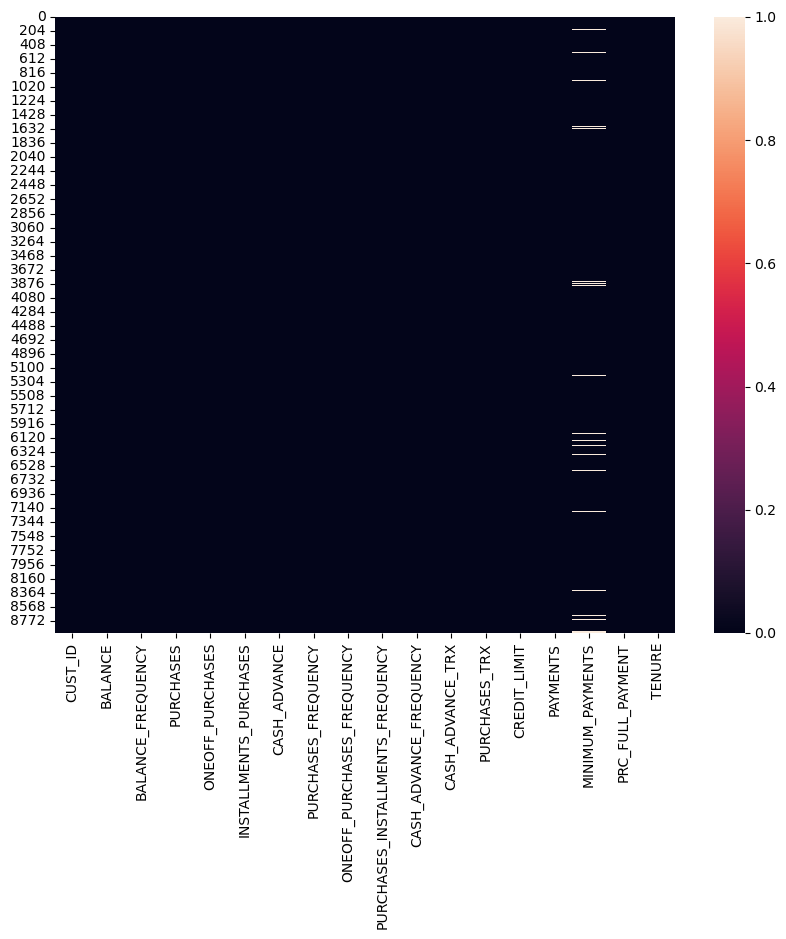

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())

Процент данных с пропусками не велик, можно ими пренебречь.

In [42]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Можно отметить сильный дисбаланс максимальных значений относительно квантилей и среднего значения в полях "PURCHASES", "CASH_ADVANCE", "INSTALLMENTS_PURCHASES", "ONEOFF_PURCHASES", "PAYMENTS", "MINIMUM_PAYMENTS", "PURCHASES_TRX", "CASH_ADVANCE_TRX" похожих на выбросы.

Половина пользователей не пользуется рассрочкой. Из оставшихся пользователей всего 15% полностью погасили займ.

Обработка данных

In [45]:
df.dropna(inplace=True)

In [46]:
df.shape

(8636, 18)

In [47]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Рассмотрим поля с выбросами:

<Axes: ylabel='CASH_ADVANCE_TRX'>

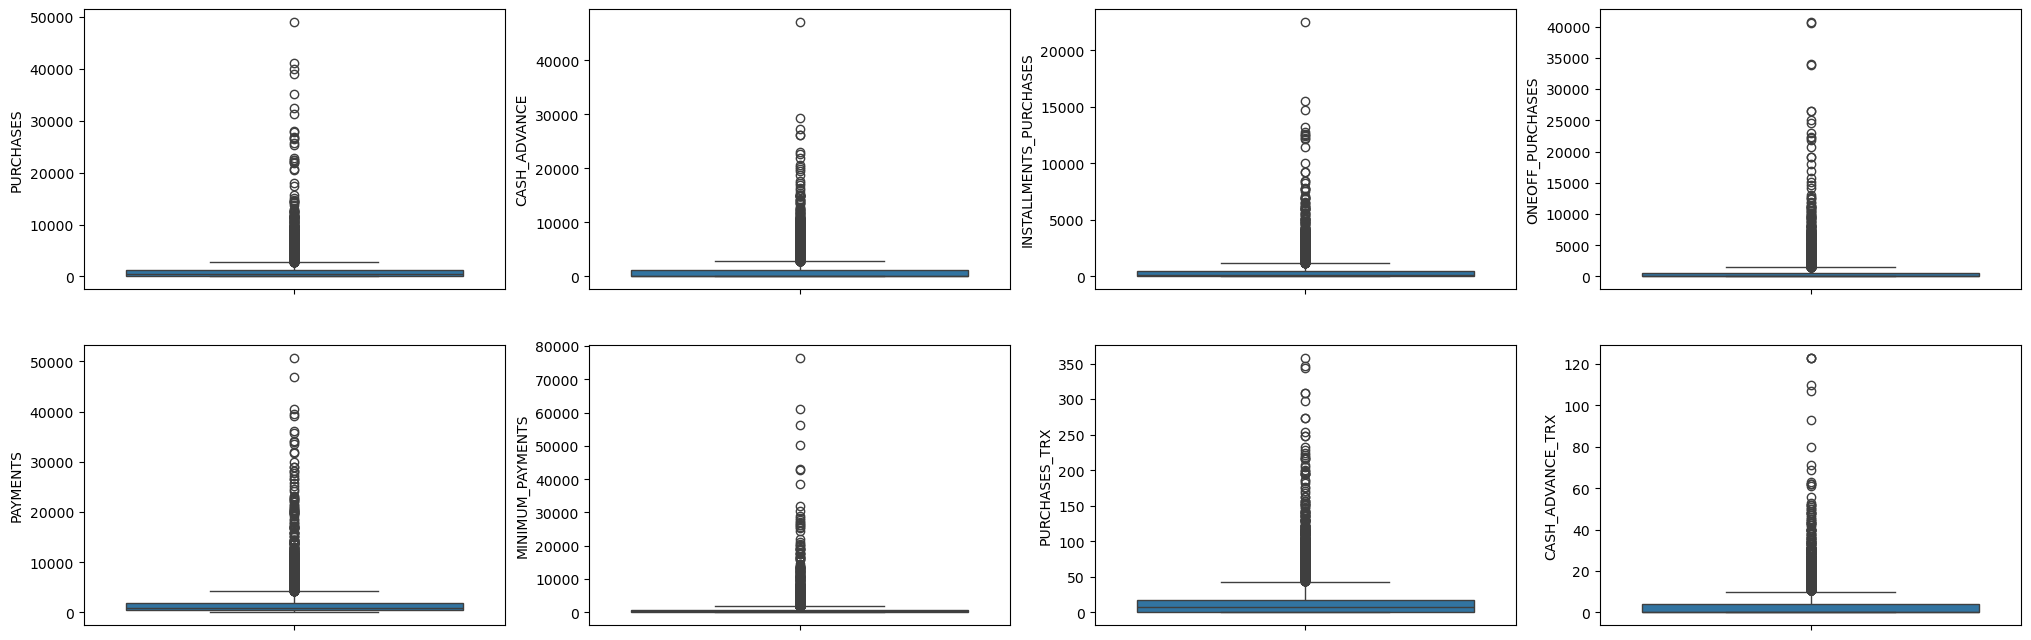

In [49]:
fig, ax =plt.subplots(2,4, figsize=(25, 8))

sns.boxplot(df['PURCHASES'], ax=ax[0,0])
sns.boxplot(df['CASH_ADVANCE'], ax=ax[0,1])
sns.boxplot(df['INSTALLMENTS_PURCHASES'], ax=ax[0,2])
sns.boxplot(df['ONEOFF_PURCHASES'], ax=ax[0,3])
sns.boxplot(df['PAYMENTS'], ax=ax[1,0])
sns.boxplot(df['MINIMUM_PAYMENTS'], ax=ax[1,1])
sns.boxplot(df['PURCHASES_TRX'], ax=ax[1,2])
sns.boxplot(df['CASH_ADVANCE_TRX'], ax=ax[1,3])

Скорректируем датасет исходя из наблюдений выше

In [51]:
clear_df = df[(df['PURCHASES']<3000) & \
   (df['CASH_ADVANCE']<2000) &\
   (df['INSTALLMENTS_PURCHASES']<1000) &\
   (df['ONEOFF_PURCHASES']<1500) &\
   (df['PAYMENTS']<3000) &\
   (df['MINIMUM_PAYMENTS']<1500) &\
   (df['PURCHASES_TRX']<50) &\
   (df['CASH_ADVANCE_TRX']<10)
  ]

In [52]:
clear_df.shape

(4910, 18)

In [53]:
clear_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000
mean,780.111304,0.861012,403.222016,216.119965,187.491859,259.984300,0.456579,0.147623,0.331946,0.073261,1.187984,8.285336,3302.029326,701.858435,329.765335,0.164409,11.490020
std,964.777681,0.236272,431.168022,351.904872,244.059289,473.037501,0.381003,0.246839,0.374869,0.118892,2.007294,8.980289,2774.416764,570.906019,301.861342,0.299428,1.381941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.056466,0.019163,0.000000,6.000000
25%,51.678494,0.818182,48.360000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,292.015094,140.766132,0.000000,12.000000
50%,388.503169,1.000000,272.650000,0.000000,71.460000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2500.000000,538.604642,199.882963,0.000000,12.000000
75%,1188.514115,1.000000,616.000000,305.592500,319.522500,282.418314,0.833333,0.166667,0.666667,0.090909,2.000000,12.000000,4000.000000,927.272868,429.747293,0.181818,12.000000
max,5942.683036,1.000000,2368.840000,1499.120000,999.000000,1998.061069,1.000000,1.000000,1.000000,0.900000,9.000000,49.000000,25000.000000,2997.714455,1496.978704,1.000000,12.000000


<Axes: xlabel='CASH_ADVANCE_TRX', ylabel='Density'>

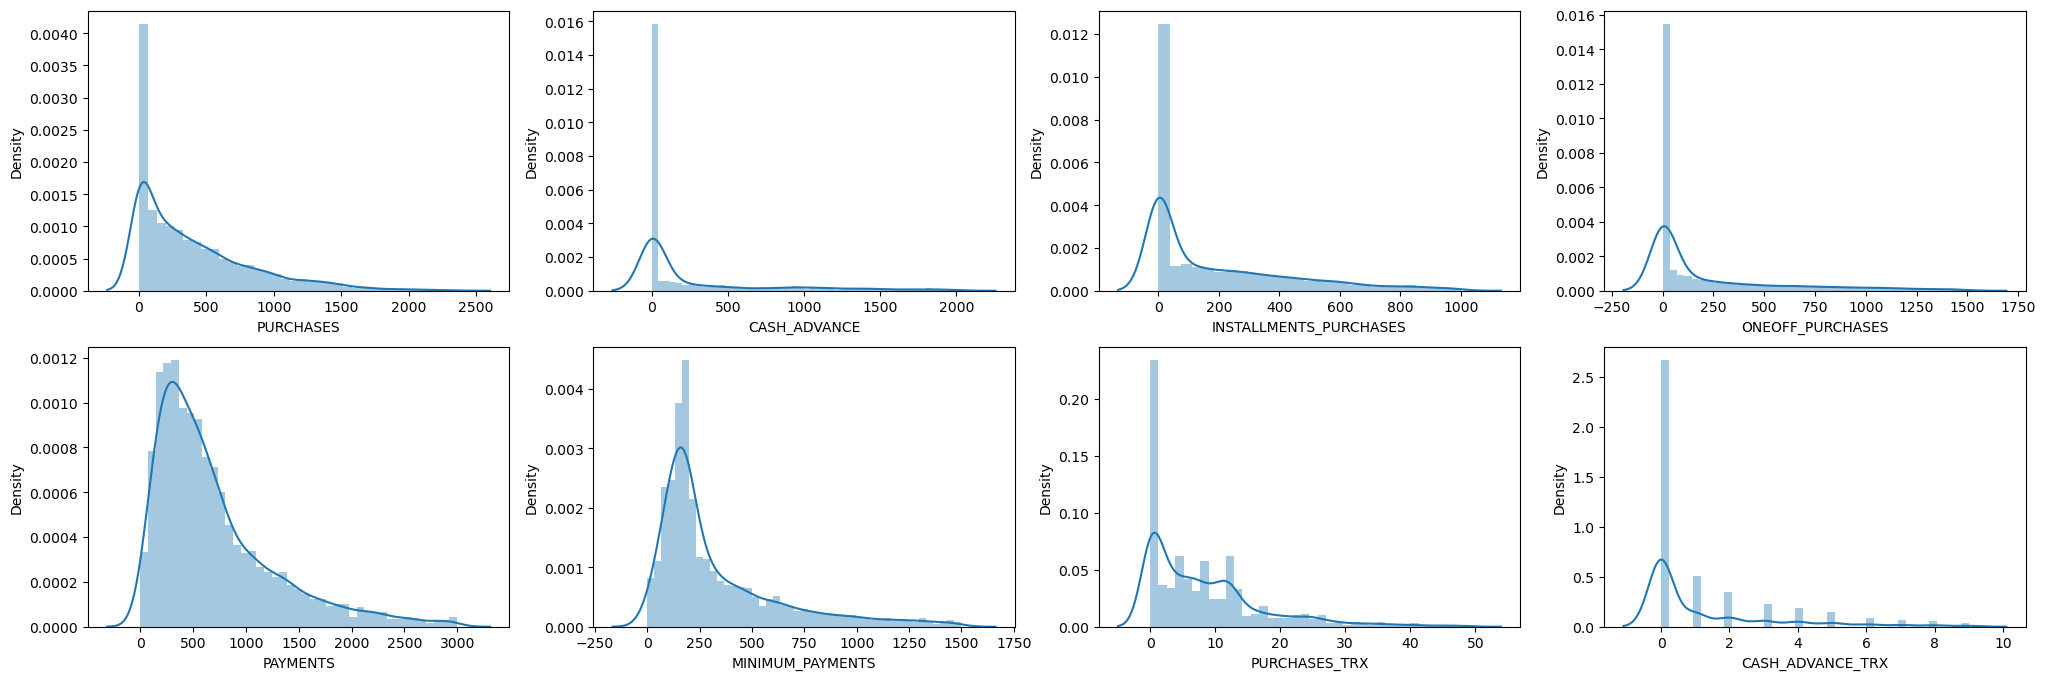

In [54]:
fig, ax =plt.subplots(2,4, figsize=(25, 8))

sns.distplot(clear_df['PURCHASES'], ax=ax[0,0])
sns.distplot(clear_df['CASH_ADVANCE'], ax=ax[0,1])
sns.distplot(clear_df['INSTALLMENTS_PURCHASES'], ax=ax[0,2])
sns.distplot(clear_df['ONEOFF_PURCHASES'], ax=ax[0,3])
sns.distplot(clear_df['PAYMENTS'], ax=ax[1,0])
sns.distplot(clear_df['MINIMUM_PAYMENTS'], ax=ax[1,1])
sns.distplot(clear_df['PURCHASES_TRX'], ax=ax[1,2])
sns.distplot(clear_df['CASH_ADVANCE_TRX'], ax=ax[1,3])

Распределение не идеально, но это всё равно улучшило качество данных. С другой стороны удаление выбросов довольно грубый метод, в результате которого множество полезных данных теряется. Не в учебных целях использовать такой подход не желательно.

In [56]:
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(clear_df.drop(['CUST_ID'], axis=1)),
                       columns = clear_df.drop(['CUST_ID'], axis=1).columns,
                       index = clear_df.index
                      )

K-means и поиск оптимального числа кластеров методом локтя

In [58]:
distance = []

for k in range(1,15):
  estimator = KMeans(n_clusters = k)
  estimator.fit(norm_df)
  distance.append(estimator.inertia_)

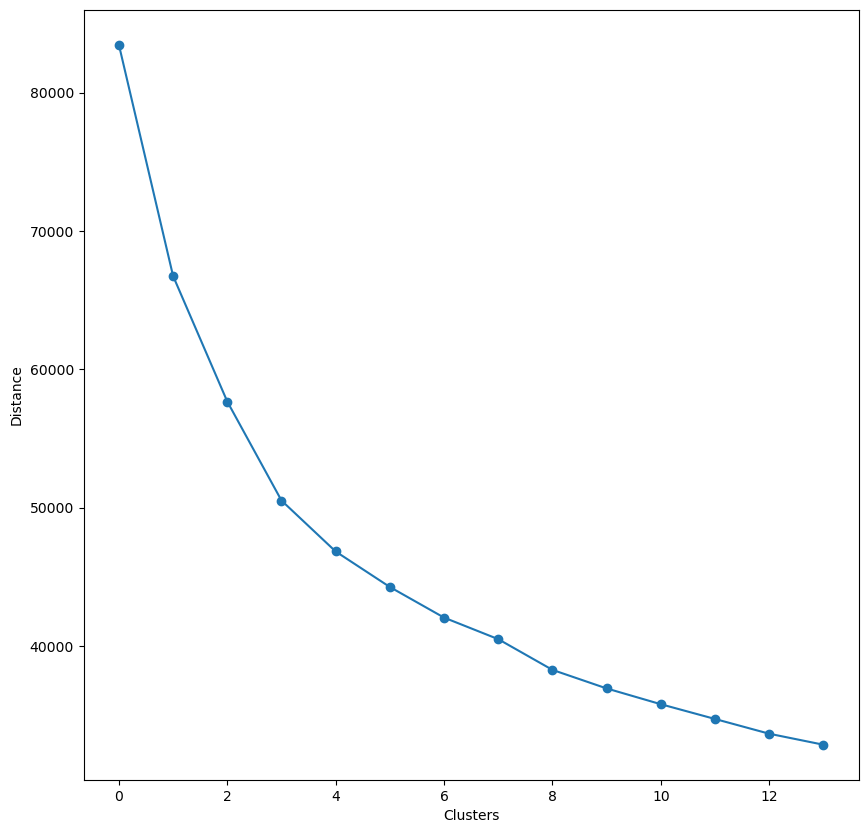

In [59]:
k = range(1,15)
plt.figure(figsize=(10, 10))
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.plot(distance, '-o')

Используя метод "локтя" можно предположить, что оптимальное количество кластеров равно 4

In [61]:
cluster = KMeans(n_clusters=6)
kmeans = cluster.fit_predict(norm_df)

Агломеративная кластеризация и поиск оптимального числа кластеров с построением дерева

In [63]:
linkage_df = linkage(norm_df, method="ward")

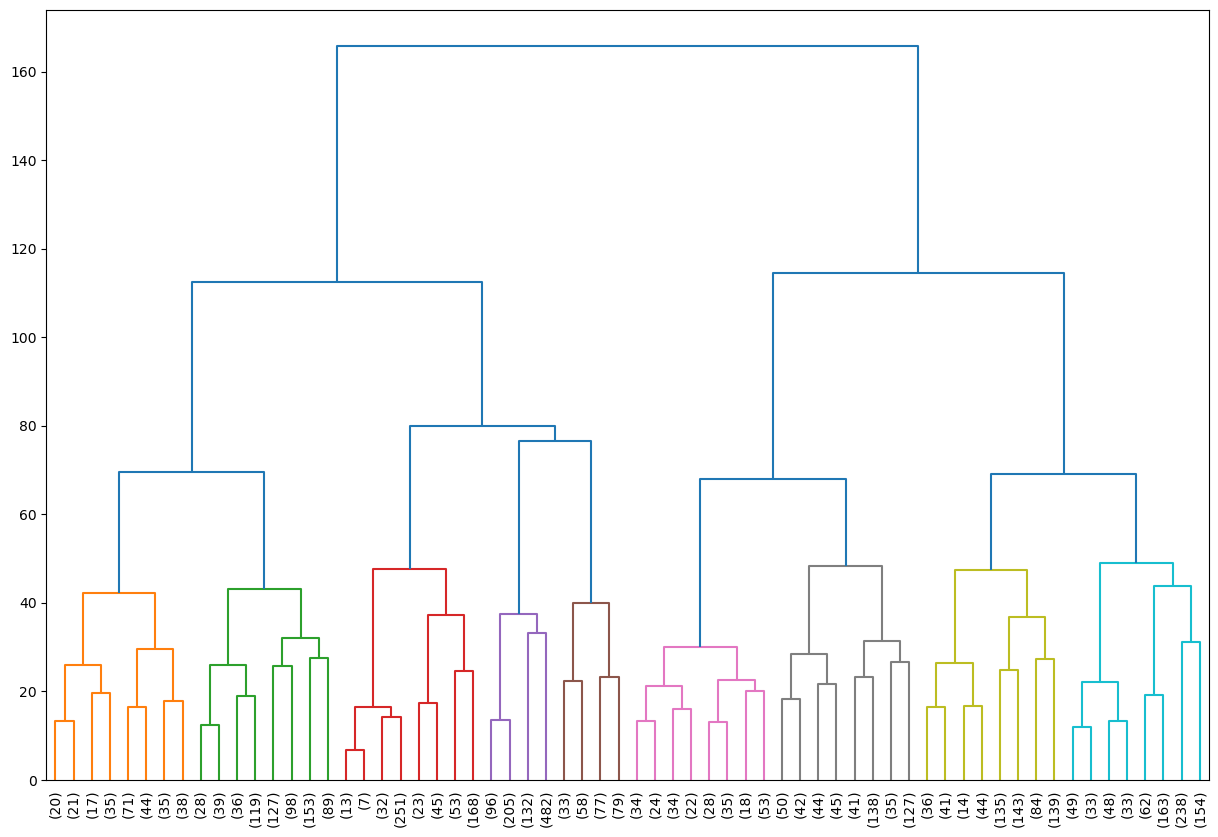

In [64]:
plt.figure(figsize=(15,10))
dendrogram(linkage_df,leaf_rotation=90,p=5,color_threshold=50,leaf_font_size=10,truncate_mode='level')
plt.show()

Визуально оптимальное число кластеров согласно этому алгоритму равно 6.

In [66]:
aggl = AgglomerativeClustering(n_clusters=6)
aggl = aggl.fit_predict(norm_df)

DBSCAN

In [68]:
dbscan = DBSCAN()
dbscan = dbscan.fit_predict(norm_df)

Оценка результата

Для визуализации кластеризации уменьшим размерность данных:

In [71]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(norm_df)

In [72]:
pca_dataframe = pd.DataFrame(data = principal_comp,columns = ['comp_1','comp_2'])

In [73]:
pca_dataframe['K_means_cls'] = kmeans

Text(0.5, 1.0, 'K_means (Метод k-средних)')

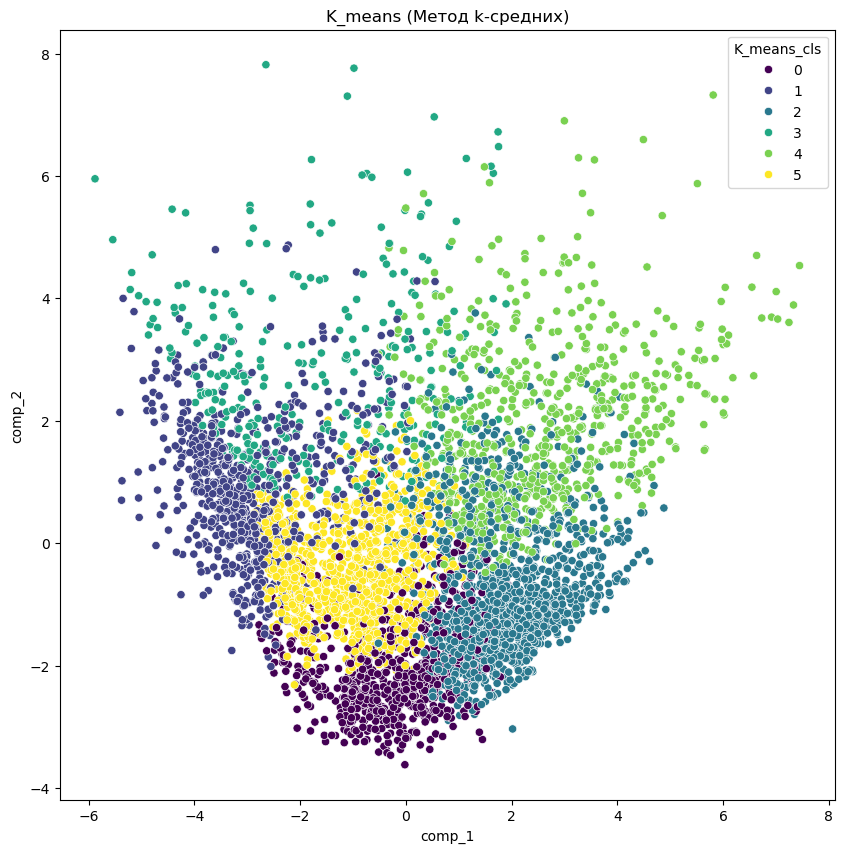

In [74]:
plt.figure(figsize=(10,10))

sns.scatterplot(data=pca_dataframe, x='comp_1', y='comp_2', hue='K_means_cls', palette="viridis")
plt.title('K_means (Метод k-средних)')

In [75]:
pca_dataframe['Aggl_cls'] = aggl

Text(0.5, 1.0, 'Agglomerative Clustering (Алгомеративная кластеризация)')

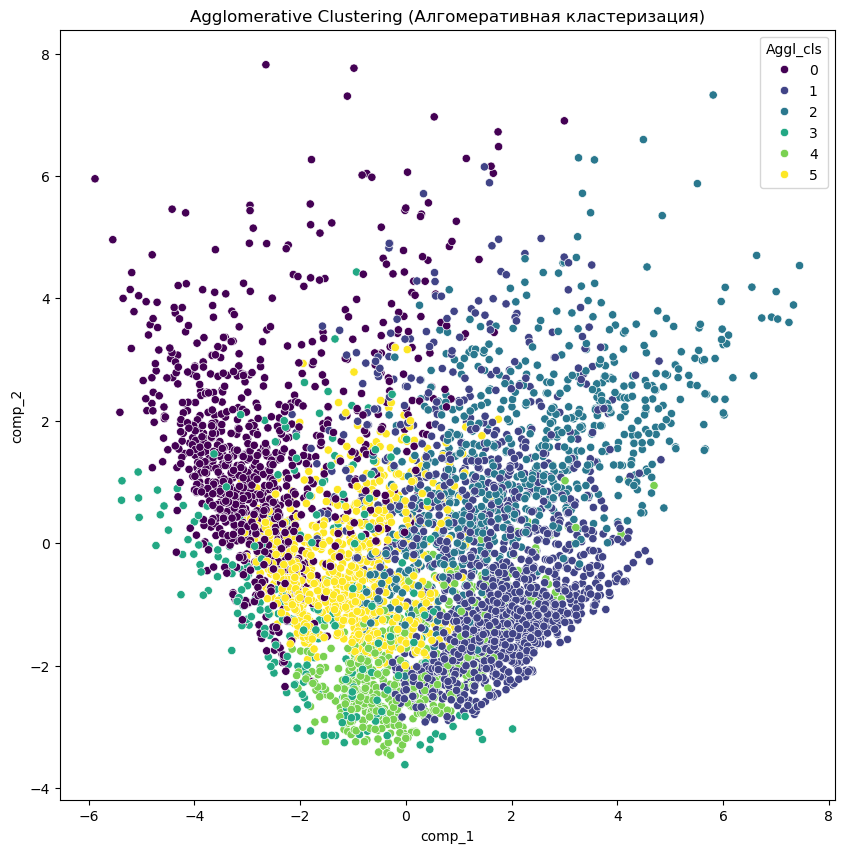

In [76]:
plt.figure(figsize=(10,10))

sns.scatterplot(data=pca_dataframe, x='comp_1', y='comp_2', hue='Aggl_cls', palette="viridis")
plt.title('Agglomerative Clustering (Алгомеративная кластеризация)')

In [77]:
pca_dataframe['DBSCAN'] = dbscan

Text(0.5, 1.0, 'DBSCAN (Пространственная кластеризация)')

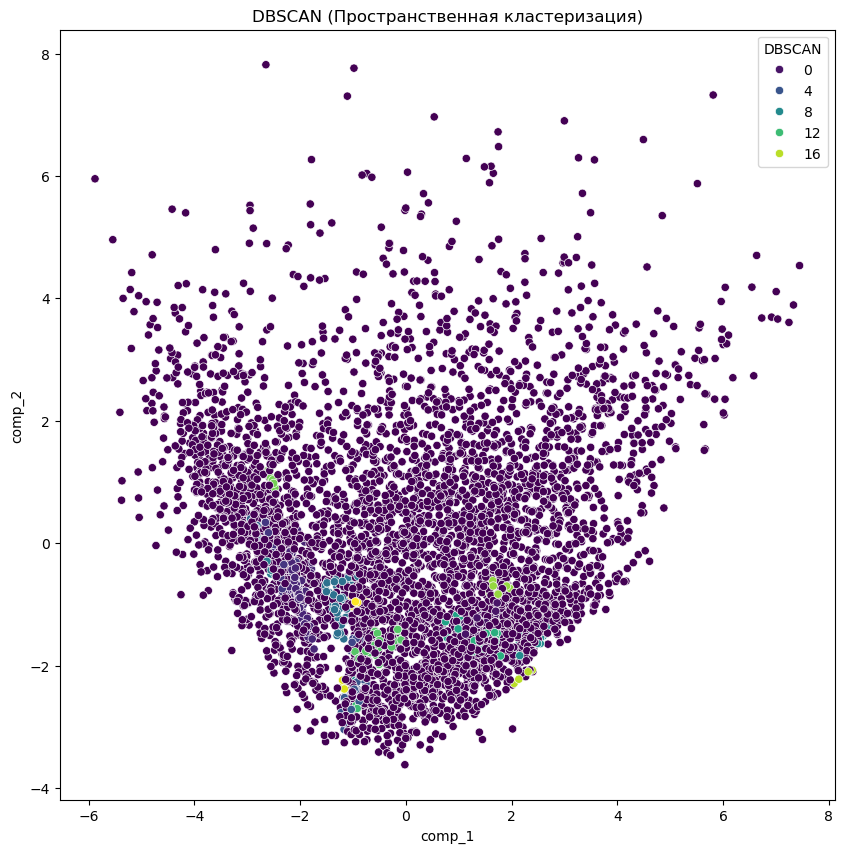

In [78]:
plt.figure(figsize=(10,10))

sns.scatterplot(data=pca_dataframe, x='comp_1', y='comp_2', hue='DBSCAN', palette="viridis")
plt.title('DBSCAN (Пространственная кластеризация)')

Визуально K-means выглядит более предпочтительным вариантом. Проверим работу класетризаторов с помощью метрик:

Так как у нас нет целевых меток, мы не можем использовать ARI, AMI, Homogenity, Completeness и связанные с ними метрики, поэтому используем оценку силуэта: silhouette_score

In [80]:
from sklearn.metrics import silhouette_score

In [81]:
print('Метрика silhouette_score:')
print('Оценка K-Mean: {}'.format(silhouette_score(pca_dataframe[['comp_1', 'comp_2']], pca_dataframe['K_means_cls'])))
print('Оценка Agglomerative Clustering: {}'.format(silhouette_score(pca_dataframe[['comp_1', 'comp_2']], pca_dataframe['Aggl_cls'])))
print('Оценка DBSCAN: {}'.format(silhouette_score(pca_dataframe[['comp_1', 'comp_2']], pca_dataframe['DBSCAN'])))

Метрика silhouette_score:
Оценка K-Mean: 0.18103779448634097
Оценка Agglomerative Clustering: 0.06838894418558109
Оценка DBSCAN: -0.5776506062208925


Согласно оценке лучший результат показывает K-mean